In [25]:
import scipy.io.wavfile as wav
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline  
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.size'] = 20
plt.style.use(['seaborn-bright', 'seaborn-paper'])


sample rate =  48000 Hz
N =  2933760
duration =  61.12 s


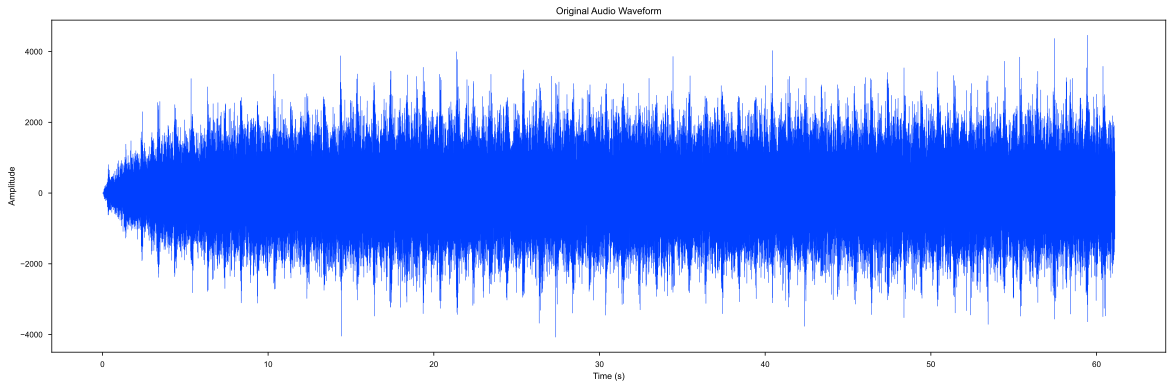

In [53]:
# Read the .wav file
sample_rate, audio_data = wav.read("CoolingHead.wav")
N = len(audio_data)
duration = N/sample_rate
time = np.linspace(0, duration, len(audio_data))

print('sample rate = ',sample_rate,'Hz')
print('N = ',N)
print('duration = ',duration,'s')

# Plot the original waveform
plt.figure(figsize=(20, 6))
plt.plot(time, audio_data, lw=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Original Audio Waveform")
plt.show()

In [50]:
# Cutoff
time_on_index = 10*sample_rate
time_off_index = 60*sample_rate
audio_data_cut = audio_data[time_on_index:time_off_index]
time_cut = time[time_on_index:time_off_index]

# Abandon DC term
audio_data_cut_no_DC = audio_data_cut - np.mean(audio_data_cut)

# Fourier
#spec = np.abs(np.fft.fft(audio_data_cut))
spec = np.abs(np.fft.fft(audio_data_cut_no_DC))
freq = np.fft.fftfreq(N, 1 / sample_rate)

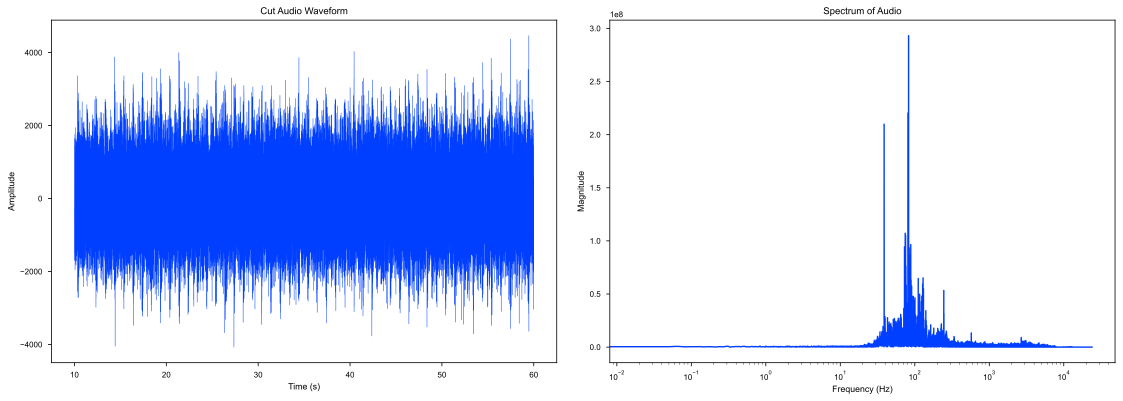

In [57]:
# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(time_cut, audio_data_cut, lw=0.5)
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Amplitude")
axes[0].set_title("Cut Audio Waveform")

axes[1].plot(freq[:N//2], spec[:N//2])
axes[1].set_xlabel("Frequency (Hz)")
axes[1].set_xscale('log')
axes[1].set_ylabel("Magnitude")
axes[1].set_title("Spectrum of Audio")

plt.tight_layout()

In [54]:
# Find the largest spec and its freq
peak_freq_index = np.argmax(spec)
peak_freq = freq[peak_freq_index]
print('Peak Freq = ',peak_freq,'Hz')

Peak Freq =  82.55890052356021 Hz
